In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df = pd.read_excel('conexoes.xlsx')
df.head()

,Nome,Alana Luiza Resende,Alfonso Carlos Paes Martinez Junior,Amanda Nunes Assunção,Ana Clara Minghin De Mendonça Corrêa,Angelo Ferreira Assis,Arthur Miranda Gomes,Bernardo Bruno Pereira Lopes,Cézar Augusto de Azevedo,Clarissa de Araujo Leite dos Reis,...,Sávio Mendes Miranda,Taianne Valerie Alves Motta,Taylane Caroline Melo de Oliveira,Thatiane Karoline Gonzaga Severino,Thiago Ferreira Peixoto,Vinícius Cesar Trugillo Barbi,Vitor Lúcio dos Santos Ferreira,Yasmine de Melo Leite,Tainara Camila Zacarias,Luana Ferreira Ribeiro
0,Alana Luiza Resende,NaN,0.5,0.5,NaN,0.5,0.5,0.5,0.5,0.5,...,0.5,0.5,NaN,0.5,0.5,1.0,0.5,0.5,0.5,1.0
1,Alfonso Carlos Paes Martinez Junior,0.5,NaN,0.5,NaN,0.5,2.0,0.5,2.0,0.5,...,0.5,0.5,NaN,0.5,0.5,0.5,1.0,0.5,0.5,0.5
2,Amanda Nunes Assunção,0.5,0.5,NaN,NaN,0.5,1.0,1.0,0.5,2.0,...,0.5,2.0,NaN,2.0,0.5,2.0,0.5,2.0,0.5,0.5
3,Ana Clara Minghin De Mendonça Corrêa,0.5,2.0,0.5,NaN,0.5,2.0,0.5,2.0,0.5,...,0.5,0.5,NaN,1.0,2.0,2.0,2.0,0.5,1.0,2.0
4,Angelo Ferreira Assis,0.5,0.5,0.5,NaN,NaN,2.0,0.5,0.5,0.5,...,1.0,1.0,NaN,2.0,1.0,0.5,2.0,1.0,0.5,2.0


In [3]:
# atribui cores a cada um dos nomes
df['cor'] = np.random.randint(0,0xFFFFFF, size=len(df))
df['cor'] = df['cor'].apply(lambda x: str(hex(x))[2:]).astype(str)

# derrete o dataframe e remove quem não respondeu
df = df.melt(id_vars=['Nome','cor'],value_vars=df.columns)
df.columns = ['nome1','cor','nome2','relacao']
df.dropna(inplace=True, how='all',axis=1)
df.dropna(inplace=True)
df.reset_index(inplace=True)
df.drop(['index'],axis=1,inplace=True)
df.info()

# substitui as conexões inexistentes para não poluir a visualização final
df = df[df['relacao']>0.5]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1120 entries, 0 to 1119
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   nome1    1120 non-null   object 
 1   cor      1120 non-null   object 
 2   nome2    1120 non-null   object 
 3   relacao  1120 non-null   float64
dtypes: float64(1), object(3)
memory usage: 35.1+ KB


In [4]:
from pyvis import network as net
import networkx as nx

pessoas_net = net.Network(height='750px', width='80%', bgcolor='#FFFFFF', font_color='red', notebook=True)
pessoas_net.prep_notebook()
pessoas_net.barnes_hut(gravity=-5e5)

fonte = df['nome1']
destino = df['nome2']
pesos = df['relacao']
cores = df['cor']
tamanhos = (df.groupby('nome1').sum()['relacao']**2)/20 # explicita mais a diferença entre eles

for e in zip(fonte,destino,pesos,cores):
    # define o elemento no loop
    fnt = e[0]
    dst = e[1]
    rel = e[2]
    cor = e[3]
    
    #adiciona os nós
    pessoas_net.add_node(fnt,title=fnt,shape='circle',color=cor,size=tamanhos.loc[fnt])
    pessoas_net.add_node(dst,dst,title=dst,shape='circle',size=tamanhos.loc[dst])
    pessoas_net.add_edge(fnt,dst,value=rel)
        

    
pessoas_net.set_edge_smooth('discrete')
pessoas_net.show_buttons()
pessoas_net.show('teste1.html')

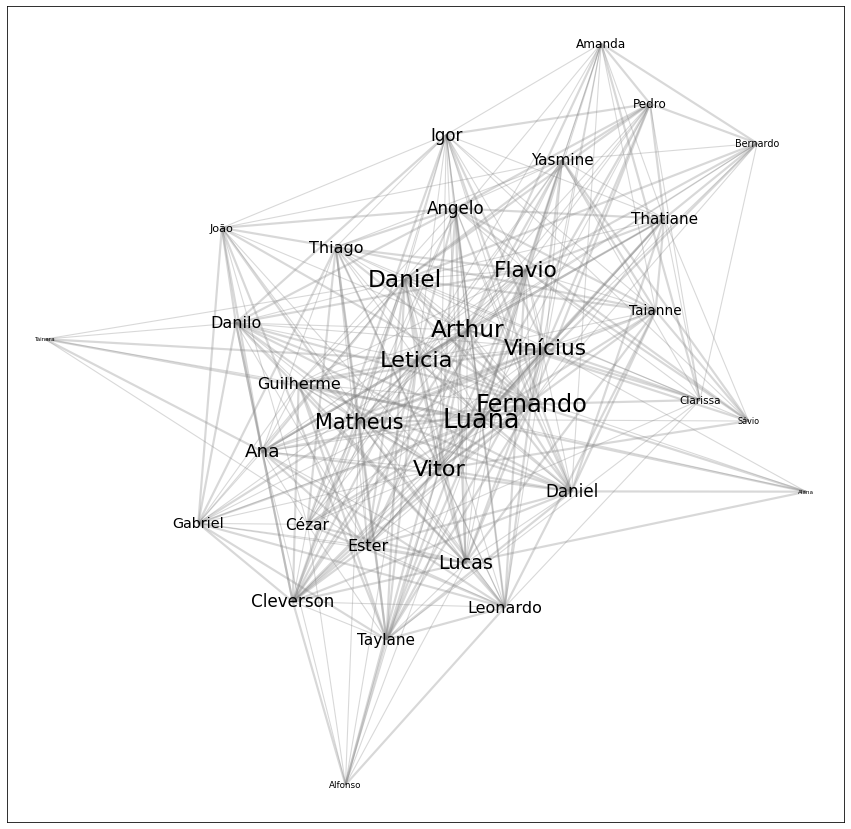

In [78]:
import networkx as nx

# declara o grafo
rede = nx.Graph()

# define as variáveis
fonte = df['nome1']
destino = df['nome2']
pesos = df['relacao']
cores = df['cor']
cores_rgb = [list(np.random.choice(range(256), size=3)/255) for i in range(len(fonte.unique()))]

for e in zip(fonte,destino,pesos,cores):
    # define o elemento no loop
    fnt = e[0]
    dst = e[1]
    rel = e[2]
    cor = e[3]
    
    # adiciona os nós
    rede.add_node(fnt)

    # adiciona as conexões
    rede.add_edge(fnt,dst)
    
# coloca nomes mais amigáveis
traducao = dict(zip(df['nome1'].unique(),[item.split(' ')[0] for item in df['nome1'].unique()]))

# declara uma figura
fig, ax = plt.subplots(figsize=(15,15))

# desenha a rede
posicoes = nx.spring_layout(rede, k=1, seed=42)
# conexões
nx.draw_networkx_edges(rede,
                       posicoes,
                       alpha=0.3,
                       edge_color='gray',
                       width=pesos*1.1)
# nós
nx.draw_networkx_nodes(rede,posicoes,
                       alpha=0,
                       node_size=(df.groupby('nome1').sum()['relacao']**2).loc[list(rede.nodes())], 
                       # por algum motivo o tamanho da série se alterava quando eu usava uma variável
                       node_color=cores_rgb)
# nomes
# nx.draw_networkx_labels(rede,
#                         posicoes,
#                         traducao);
# muda os tamanhos das fontes (não dá pra mudar direto na função de cima)
from matplotlib.pyplot import text
for node, (x, y) in posicoes.items():
    text(x, y, traducao[node], fontsize=rede.degree[node]*0.8, ha='center', va='center')
